In [21]:
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
stopw  = set(stopwords.words('english'))

In [23]:
def readFile(file): 
    f = open(file,'r',encoding='utf-8')
    text = f.read()
    sentences = nltk.sent_tokenize(text)
    
    data = []
    for sent in sentences:
        words =  nltk.word_tokenize(sent)
        words = [w.lower() for w in words if len(w)>2 and w not in stopw]
        data.append(words)
        
    return data

text = readFile('bollywood2.txt')

In [24]:
print(text)

[['deepika', 'padukone', 'ranveer', 'singh', 'wedding', 'one', 'biggest', 'bollywood', 'events', 'happened', '2018'], ['the', 'deepika', 'ranveer', 'celebrations', 'hooked', 'phones', 'waiting', 'come', 'also', 'gave', 'enough', 'reason', 'believe', 'stylish', 'two', 'couple'], ['from', 'airport', 'looks', 'reception', 'parties', 'everything', 'entire', 'timeline', 'deepika', 'ranveer', 'wedding', 'style', 'file'], ['not', 'ambanis', 'deepika', 'ranveer', 'priyanka', 'nick'], ['man', 'proves', 'wedding', 'the', 'year', 'this', 'year', 'year', 'big', 'fat', 'lavish', 'extravagant', 'weddings'], ['from', 'isha', 'ambani', 'anand', 'piramal', 'deepika', 'padukone', 'ranveer', 'singh', 'priyanka', 'chopra', 'nick', 'jonas', 'kapil', 'sharma', 'ginni', 'chatrath', '2018', 'saw', 'many', 'grand', 'weddings'], ['but', 'nothing', 'beats', 'man', 'wedding', 'the', 'year', 'award', 'social', 'media'], ['priyanka', 'also', 'shared', 'video', 'featuring', 'nick', 'jonaswas', 'also', 'celebrating',

In [106]:
from gensim.models import Word2Vec

model = Word2Vec(text,size=300,window=10,min_count=1,iter=900)

print(model)
words = list(model.wv.vocab)
print(words)

Word2Vec(vocab=116, size=300, alpha=0.025)
['deepika', 'padukone', 'ranveer', 'singh', 'wedding', 'one', 'biggest', 'bollywood', 'events', 'happened', '2018', 'the', 'celebrations', 'hooked', 'phones', 'waiting', 'come', 'also', 'gave', 'enough', 'reason', 'believe', 'stylish', 'two', 'couple', 'from', 'airport', 'looks', 'reception', 'parties', 'everything', 'entire', 'timeline', 'style', 'file', 'not', 'ambanis', 'priyanka', 'nick', 'man', 'proves', 'year', 'this', 'big', 'fat', 'lavish', 'extravagant', 'weddings', 'isha', 'ambani', 'anand', 'piramal', 'chopra', 'jonas', 'kapil', 'sharma', 'ginni', 'chatrath', 'saw', 'many', 'grand', 'but', 'nothing', 'beats', 'award', 'social', 'media', 'shared', 'video', 'featuring', 'jonaswas', 'celebrating', 'family', 'first', 'celebrated', 'christmas', 'london', 'pictures', 'new', 'outstanding', 'glimpses', 'celebration', 'verbier', 'switzerland', 'married', 'december', 'three', 'receptions', 'delhi', 'mumbai', 'jaggo', 'night', 'made', 'even', 

In [107]:
print(model["deepika"].shape)

(300,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [108]:
import numpy as np

In [109]:
all_vectors = [model[w] for w in model.wv.vocab.keys()]
all_vectors = np.array(all_vectors)
print(all_vectors.shape)
print(all)

(116, 300)
<built-in function all>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [110]:
from sklearn.manifold import TSNE
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=1)
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=1)
tsne = TSNE(n_components=2, verbose=1,n_iter=1000,random_state=1)

tsne_results = tsne.fit_transform(all_vectors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 116 samples in 0.000s...
[t-SNE] Computed neighbors for 116 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 116 / 116
[t-SNE] Mean sigma: 2.480225
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.866837
[t-SNE] KL divergence after 1000 iterations: 0.184437


In [111]:
print(tsne_results)

[[ 5.41494310e-01  3.30678630e+00]
 [-8.62862051e-01  3.57326388e+00]
 [ 5.80175638e-01  3.38833523e+00]
 [-1.12866962e+00  3.61077976e+00]
 [-1.15432464e-01 -4.73642492e+00]
 [-1.05483890e+00 -4.44708854e-01]
 [ 7.29132742e-02  5.03285646e+00]
 [ 8.47339109e-02  5.05075455e+00]
 [ 7.69168064e-02  5.04852343e+00]
 [ 7.85060078e-02  5.00853252e+00]
 [-1.56702185e+00  3.42864347e+00]
 [ 7.29451358e-01 -5.19218445e+00]
 [ 3.81820846e+00 -1.57711172e+00]
 [ 6.42444086e+00 -4.59704638e-01]
 [ 6.73087168e+00 -5.35783708e-01]
 [ 6.41600227e+00 -2.40978032e-01]
 [ 6.97754335e+00 -3.98333281e-01]
 [ 4.72795630e+00 -2.48160291e+00]
 [ 7.08159494e+00 -2.45191947e-01]
 [ 7.01430368e+00 -2.16127485e-02]
 [ 6.69831800e+00  1.36912674e-01]
 [ 6.84819508e+00  1.74637064e-01]
 [ 6.48607254e+00  1.18030205e-01]
 [ 5.87912947e-02 -1.40023220e+00]
 [-4.94962692e+00 -5.25506926e+00]
 [-2.16840476e-01  3.13633680e+00]
 [ 3.16384053e+00  5.14260626e+00]
 [ 3.45931888e+00  5.50477362e+00]
 [ 3.22986865e+00  5

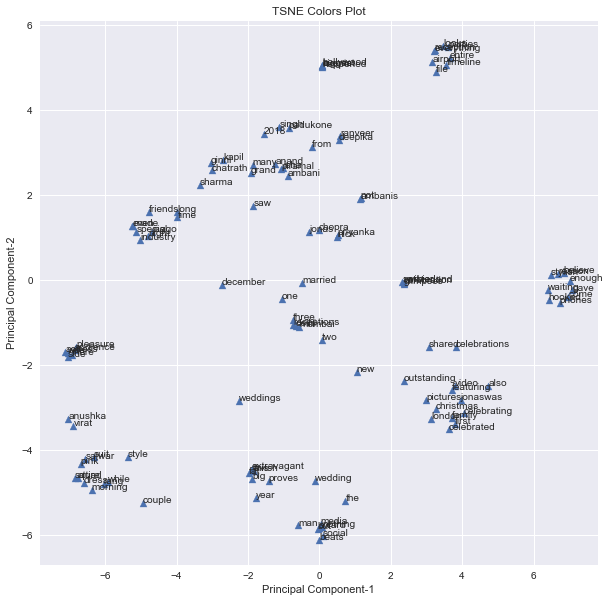

In [112]:
import matplotlib.pyplot as plt

data = tsne_results

plt.figure(figsize=(10,10))
plt.style.use('seaborn')
plt.scatter(data[:,0],data[:,1],marker='^')

keys = model.wv.vocab.keys()
for label, x, y in zip(keys, data[:,0], data[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    
plt.xlabel("Principal Component-1")
plt.ylabel("Principal Component-2")
plt.title("TSNE Colors Plot")
plt.show()

In [113]:
actors = ["ranveer","deepika","padukone","singh","nick","jonas","chopra","priyanka","virat","anushka","ginni"]


def predict_actor(a,b,c,word_vectors):
    """Accepts a triad of words, a,b,c and returns d such that a is to b : c is to d"""
    a,b,c = a.lower(),b.lower(),c.lower()
    max_similarity = -100 
    
    d = None
    words = actors
    
    wa,wb,wc = word_vectors[a],word_vectors[b],word_vectors[c]
    
    #to find d s.t similarity(|b-a|,|d-c|) should be max
    
    for w in words:
        if w in [a,b,c]:
            continue
        
        wv = word_vectors[w]
        sim = cosine_similarity([wb-wa],[wv-wc])
        
        if sim > max_similarity:
            max_similarity = sim
            d = w
    return d

In [115]:
triad = ("ranveer","deepika","priyanka")
predict_actor(*triad,model.wv)

'nick'

In [116]:
triad = ("ranveer","singh","deepika")
predict_actor(*triad,model.wv)

'padukone'

In [117]:
triad = ("deepika","padukone","priyanka")
predict_actor(*triad,model.wv)

'chopra'

In [118]:
triad = ("priyanka","jonas","nick")
predict_actor(*triad,model.wv)

'chopra'